### <center>Feature Selection</center>

#### <span style = "color:red">Get the Data</span>

In [29]:
import numpy as np
import pandas as pd

data = pd.read_csv('../data_5.csv')

In [30]:
data = data.drop(['Cryo', 'PDB', 'Cryo Type', 'neighbor trees', 'Peak Level', 'Size Cutoff >'], axis = 1)
columns = {'Map Resolution': 'Resolution', 'vTree#':'Tree_N', 'numOfVoxels': 'Voxel_N', 'numberOfNeighbors':'N_Neighbors', 'Max Density':'Max_density', 'MinDensity':'Min_density', 'AvgDensity':'Avg_density', 'stdDensity':'Std_density', 'Percentage of voxels within 1 std':'1_std', 'Percentage of voxels within 2 std':'2_std', 'PCA_EigenValue1':'PCA_1', 'PCA_EigenValue2':'PCA_2', 'PCA_EigenValue3':'PCA_3', 'PCA Thickness Ratio ev1/ev2':'Thick_R_12', 'PCA Thickness Ratio ev2/ev3':'Thick_R_23', 'Structure Tensor Helix (Percentage)':'Tensor_helix', 'Structure Tensor Sheet (Percentage)':'Tensor_sheet', 'Percentage of voxels with density less than average':'Per_voxel', 'Radius of Gyration':'R_Gyr', 'Width':'Width', 'Hlx overlap (percentage)':'Hlx_Per', 'Strand overlap (percentage)':'Sheet_Per', 'Loop overlap (percentage)':'Loop_Per', 'Unknown (percentage) - most likely outside protein model (noise)':'Unknown'}
data = data.rename(columns=columns)

In [31]:
temp = data[['Hlx_Per', 'Sheet_Per', 'Loop_Per', 'Unknown']]
max_Per = np.max(temp, axis=1)
#temp.shape, max_Per.shape
data['Max_Per'] = max_Per
data.head()
threshold = 0.9 # select data whose maximum overlap percentage is greater than a threshold
data = data[data['Max_Per'] > threshold]
data = data.drop(['Hlx_Per', 'Sheet_Per', 'Loop_Per', 'Unknown', 'Max_Per'], axis = 1)

In [32]:
data.head()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,...,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width,Label
1,5.6,73,125,6,0.65,0.51,0.57,0.04,0.62,0.98,...,5.79,2.31,1.60,2.51,0.50,0.50,0.53,4.2,5.16151,Loop
3,5.6,103,92,4,0.65,0.46,0.54,0.04,0.62,0.98,...,3.60,2.27,2.05,1.58,0.45,0.55,0.52,3.7,3.64974,Loop
5,5.6,116,78,4,0.60,0.46,0.52,0.03,0.60,0.99,...,2.56,1.57,5.50,1.63,0.54,0.46,0.50,4.3,2.10718,Loop
6,5.6,102,94,5,0.62,0.49,0.54,0.03,0.64,0.96,...,3.11,2.04,3.35,1.53,0.46,0.54,0.50,4.0,4.47000,Loop
7,5.6,66,132,3,0.66,0.49,0.55,0.04,0.62,0.97,...,4.63,3.38,1.49,1.37,0.67,0.33,0.55,3.9,5.16151,Helix


In [33]:
data = data.loc[(data['Thick_R_12'] > 0) & (data['Thick_R_23'] > 0) & (data['Resolution'] >= 5.3), :] # remove the negative Thick_R_12 and Thick_R_23

In [34]:
data_Helix = data[data['Label'] == 'Helix']
data_Sheet = data[data['Label'] == 'Sheet']
data_Loop = data[data['Label'] == 'Loop']
data_Unknown = data[data['Label'] == 'Unknown']

print(data_Helix.shape, data_Sheet.shape, data_Loop.shape, data_Unknown.shape)

(2630, 21) (1232, 21) (868, 21) (344, 21)


In [35]:
data_Helix = data_Helix.sample(n = 600, random_state = 42)
data_Sheet = data_Sheet.sample(n = 1200, random_state = 42)
data_Loop = data_Loop.sample(n = 600, random_state = 42)

In [36]:
data = pd.concat([data_Helix, data_Sheet, data_Loop])

In [37]:
data.head()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,...,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width,Label
861,5.9,25,136,6,0.53,0.42,0.46,0.02,0.65,0.99,...,5.00,3.29,4.61,1.52,0.31,0.69,0.57,5.7,3.96817,Helix
1112,5.9,83,136,4,0.71,0.45,0.55,0.07,0.63,0.97,...,3.93,3.13,3.92,1.26,0.82,0.18,0.53,4.8,4.77000,Helix
4179,5.8,33,160,5,0.73,0.54,0.61,0.05,0.68,0.96,...,4.10,2.50,1.66,1.64,0.39,0.61,0.53,3.7,6.16981,Helix
10056,6.9,20,222,3,0.77,0.51,0.60,0.06,0.70,0.95,...,4.16,2.21,3.66,1.88,0.42,0.58,0.62,4.7,8.19867,Helix
5241,5.0,36,164,4,0.67,0.55,0.61,0.02,0.67,0.96,...,4.50,2.08,3.58,2.17,0.63,0.37,0.54,4.8,7.17069,Helix


In [38]:
data.describe()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,PCA_1,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.00000,2400.000000
mean,6.088050,60.344167,144.012500,3.162083,0.612637,0.473167,0.537779,0.033292,0.647488,0.970492,10.756567,3.855575,1.878650,2.843900,2.148892,0.484204,0.515904,0.526354,3.87150,4.316349
std,1.222419,72.443777,142.098979,1.685328,0.101086,0.083048,0.086268,0.014637,0.040599,0.019127,11.652755,2.762694,1.063282,2.576841,1.063775,0.175235,0.175231,0.045410,1.43417,1.868206
min,5.000000,1.000000,10.000000,0.000000,0.230000,0.140000,0.200000,0.010000,0.460000,0.870000,0.380000,0.330000,0.120000,0.270000,0.350000,0.000000,0.000000,0.330000,1.30000,0.000000
25%,5.000000,18.000000,48.000000,2.000000,0.550000,0.430000,0.490000,0.020000,0.620000,0.960000,4.307500,2.107500,1.130000,1.670000,1.490000,0.370000,0.410000,0.500000,2.90000,3.169498
50%,5.800000,38.000000,106.500000,3.000000,0.610000,0.480000,0.540000,0.030000,0.650000,0.970000,7.730000,3.260000,1.790000,2.210000,1.840000,0.460000,0.540000,0.530000,3.70000,3.966160
75%,6.600000,74.000000,196.000000,4.000000,0.680000,0.520000,0.590000,0.040000,0.670000,0.980000,12.827500,4.840000,2.430000,3.142500,2.460000,0.590000,0.630000,0.550000,4.60000,5.163490
max,10.000000,488.000000,1992.000000,10.000000,0.950000,0.780000,0.870000,0.100000,0.820000,1.000000,216.960000,36.760000,13.810000,60.940000,11.380000,1.000000,1.000000,0.710000,15.00000,17.490000


#### <span style = "color:red">Discover and visualize the data to gain insights</span>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f9a1510>,
      dtype=object)

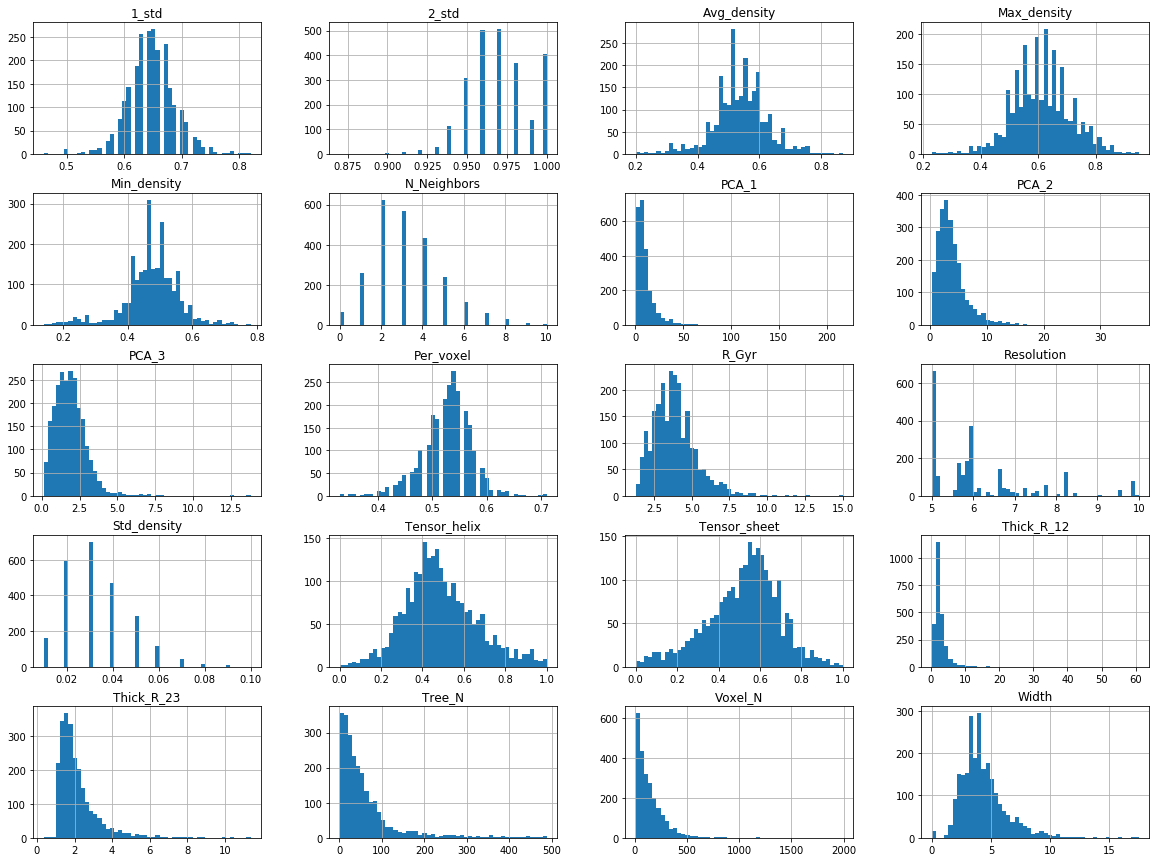

In [39]:
data.hist(bins = 50, figsize = (20, 15))

#### <span style = "color:red">Prepare Training Set and Test Set</span>

In [40]:
data_X = data.iloc[:, 0:-1]
data_Y = data.iloc[:, -1]

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
data_Y[data_Y == 'Helix'] =0
data_Y[data_Y == 'Sheet'] =1
data_Y[data_Y == 'Loop'] = 0

In [43]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=0.2, random_state=42, stratify = data_Y)
train_Y = train_Y.astype(np.int64)
test_Y = test_Y.astype(np.int64)

In [44]:
train_X.columns

Index(['Resolution', 'Tree_N', 'Voxel_N', 'N_Neighbors', 'Max_density',
       'Min_density', 'Avg_density', 'Std_density', '1_std', '2_std', 'PCA_1',
       'PCA_2', 'PCA_3', 'Thick_R_12', 'Thick_R_23', 'Tensor_helix',
       'Tensor_sheet', 'Per_voxel', 'R_Gyr', 'Width'],
      dtype='object')

#### <span style = "color:red">Prepare the Data for Machine Learning Algorithms</span>

In [45]:
# Select specific columns
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
# Create Pipeline for Numeric Columns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

left_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(['Resolution', 'Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Avg_density', 'Std_density', '1_std', '2_std', 'PCA_1',
       'PCA_2', 'PCA_3', 'Thick_R_12', 'Thick_R_23', 'Tensor_helix',
       'Tensor_sheet', 'Per_voxel', 'R_Gyr', 'Width'])),
    ("transform", QuantileTransformer(n_quantiles=200, output_distribution='normal', random_state=42))
])

right_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(['N_Neighbors'])),
])

from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("left_pipeline", left_pipeline),
        ("right_pipeline", right_pipeline),
    ])

train_X = pd.DataFrame(preprocess_pipeline.fit_transform(train_X), columns=['Resolution', 'Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Avg_density', 'Std_density', '1_std', '2_std', 'PCA_1',
       'PCA_2', 'PCA_3', 'Thick_R_12', 'Thick_R_23', 'Tensor_helix',
       'Tensor_sheet', 'Per_voxel', 'R_Gyr', 'Width', 'N_Neighbors'])
test_X = pd.DataFrame(preprocess_pipeline.transform(test_X), columns=['Resolution', 'Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Avg_density', 'Std_density', '1_std', '2_std', 'PCA_1',
       'PCA_2', 'PCA_3', 'Thick_R_12', 'Thick_R_23', 'Tensor_helix',
       'Tensor_sheet', 'Per_voxel', 'R_Gyr', 'Width', 'N_Neighbors'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20f23b90>,
      dtype=object)

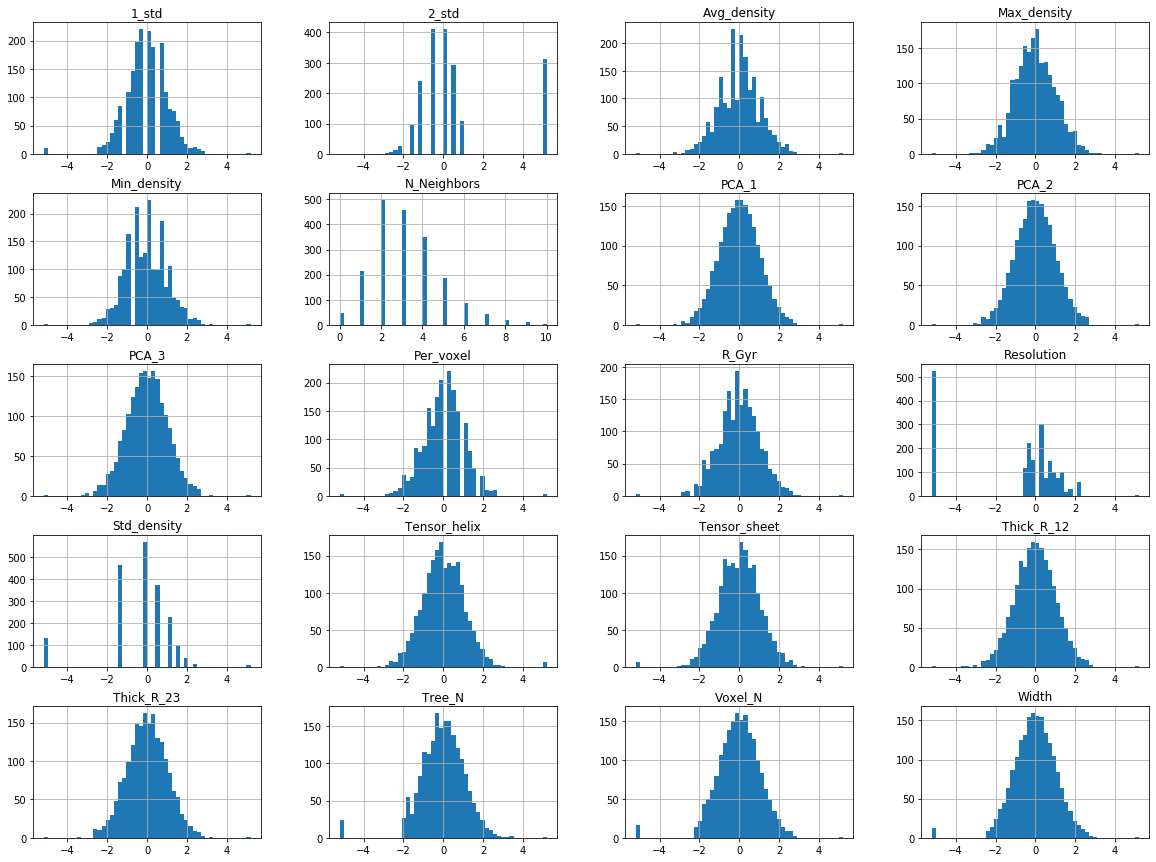

In [46]:
train_X.hist(bins = 50, figsize = (20, 15))

#### <span style = "color:red">Feature Selection</span>

In [47]:
import numpy as np
from sklearn.model_selection import cross_val_score

def cross_validation(model, X, Y, k = 10, metric = 'accuracy'):
    scores = cross_val_score(model, X, Y, scoring=metric, cv = k);
    return scores.mean(), scores.std()

#### <span style = "color:red">Best K Features</span>

In [48]:
# select best k features, k = 1, 2, ...
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

X_new = []
for i in range(1, 21):
    X_new.append(SelectKBest(f_classif, k=i).fit_transform(train_X, train_Y))
    
# use the cross-validation to decide the best k value
for i in range(1, 21):
    mean, std = cross_validation(RandomForestClassifier(random_state=42), X_new[i-1], train_Y, 10)
    print(i, mean, std)

1 0.5979166666666667 0.0398565134785604
2 0.5755208333333333 0.032463420921348796
3 0.565625 0.027775607554111237
4 0.6677083333333332 0.033657280044590655
5 0.6942708333333334 0.023873263825762173
6 0.696875 0.0326758065444961
7 0.7072916666666667 0.026331718041176105
8 0.7010416666666666 0.03161248105311149
9 0.7114583333333334 0.028923840368572554
10 0.7166666666666666 0.03328446939306347
11 0.7104166666666667 0.024672331838181294
12 0.7234375 0.029778734081089178
13 0.7151041666666667 0.02635746026849999
14 0.721875 0.030476539246516228
15 0.7317708333333333 0.030480989350832346
16 0.7291666666666667 0.035706534377088775
17 0.7354166666666666 0.0339781383964585
18 0.7265625 0.02718829820028789
19 0.7286458333333333 0.02740692107692264
20 0.7291666666666667 0.024317953187351554


In [52]:
# Use the inverse transform to check which features are selected, the removed feature have all 0s
sel = SelectKBest(f_classif, k=15)
X_new = sel.fit_transform(train_X, train_Y)
X_inverse = pd.DataFrame(sel.inverse_transform(X_new), columns = train_X.columns)
X_inverse.head()

,Resolution,Tree_N,Voxel_N,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,PCA_1,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width,N_Neighbors
0,-5.199338,-1.531572,0.170876,-0.126296,-0.287317,-0.261159,-0.107272,0.353627,0.0,0.0,2.299628,0.0,0.326933,2.092586,-0.527293,0.527293,0.0,1.957819,0.0,9.0
1,0.274215,0.534545,-5.199338,-0.012596,1.210386,0.686398,-1.307760,1.322717,0.0,0.0,-1.826073,0.0,-0.183671,-0.892996,-1.809639,1.809639,0.0,-1.843016,0.0,3.0
2,0.874383,-0.608715,0.019323,1.337975,0.484345,0.686398,1.595714,0.911923,0.0,0.0,-0.394154,0.0,0.844193,-1.054930,-0.407805,0.373814,0.0,-0.018895,0.0,2.0
3,-0.534545,-1.809639,2.497833,1.667186,1.088483,1.492079,1.077164,0.639323,0.0,0.0,1.971383,0.0,0.735046,1.620648,0.670542,-0.686398,0.0,1.957819,0.0,4.0
4,1.385731,-1.307760,1.356224,0.491440,-0.107272,0.267681,0.534545,-0.498558,0.0,0.0,0.490890,0.0,1.831665,-0.811488,1.385731,-1.385731,0.0,1.552247,0.0,2.0
